<div align="center">
  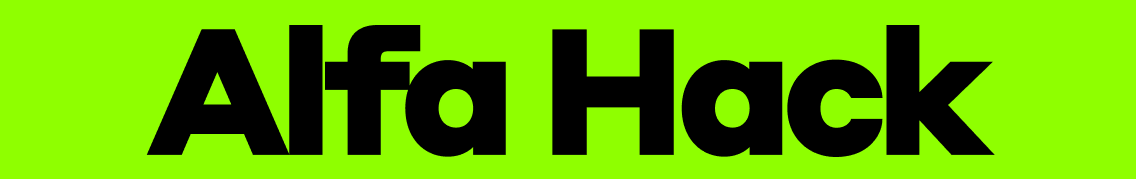
</div>

## Этап 1. Установка библиотек и импорт данных

In [1]:
# Cкачиваем необходимые библиотеки для работы
!pip install pandas numpy scikit-learn

In [2]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import glob
import os

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа-банка. Кейс 3"_, то необходимо поменять путь к директории и ссылки ниже

In [4]:
# Путь к папке с тренировочными данными
path_train = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/train'
# Путь к папке с тестовыми данными
path_test = '/content/drive/MyDrive/Хакатон Альфа-банка. Кейс 3/test'

Получим список файлов в каждой из папок с данными

In [5]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории train: ['train_1.csv', 'train_10.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv', 'train_5.csv', 'train_6.csv', 'train_7.csv', 'train_8.csv', 'train_9.csv']
Список файлов в репозитории test: ['test_1.csv', 'test_10.csv', 'test_2.csv', 'test_3.csv', 'test_4.csv', 'test_5.csv', 'test_6.csv', 'test_7.csv', 'test_8.csv', 'test_9.csv']


Объединим тренировочные и тестовые данные в единые датасеты train и test

In [6]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pd.concat(data_files_train, ignore_index=True)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строки и {} столбцов'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
data_train['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 413194 строки и 189 столбцов'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,0,train,0,0.160673,0.967855,-0.744988,0.312510,0.747232,-1.033859,50.0,...,-1.253606,-0.907266,9.0,1.482576,0.110931,1.832169,0.731675,-0.739851,99.0,-0.005449
1,0,train,1,1.215775,0.409084,-0.499872,1.081988,0.709146,1.164660,1.0,...,-0.106539,-0.701140,9.0,0.175049,0.532301,0.116916,-1.229896,1.331139,1.0,-0.353498
2,1,train,2,-0.622386,-0.220737,-0.967224,-1.213633,-0.782765,-0.352342,2.0,...,-0.435479,-0.585773,9.0,0.100763,-0.586752,-0.514722,-0.688141,0.290357,2.0,-0.553296
3,0,train,3,-1.943180,-0.222065,1.143199,1.430957,1.120050,-0.898908,3.0,...,-0.989614,-1.490202,9.0,0.556689,0.320663,0.057659,0.987459,1.749471,3.0,0.950720
4,0,train,4,0.473792,0.204881,-0.382441,0.397711,-0.419451,1.178728,2.0,...,2.170770,0.879764,9.0,0.119195,0.548174,0.108961,1.447481,-0.129048,2.0,2.083665


,count
smpl,
train,413194


In [7]:
# Получим список путей к файлам в папке test
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем все файлы test и добавим их в список
for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

# Объединим тестовые данные в единый датасет
data_test = pd.concat(data_files_test, ignore_index=True)

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

# Выведем первые 5 строк тренировочных данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки test
data_test['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 171919 строк и 188 столбцов'

,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,test,413194,-0.589627,-1.061564,-0.950936,0.324714,0.884931,-2.461308,4.0,-0.545123,...,-1.291434,-0.084685,9.0,-0.181098,-1.563904,0.640471,-0.533898,0.766548,10.0,-0.403965
1,test,413195,0.178462,0.447035,-2.641815,0.770743,-1.708153,0.550560,2.0,0.014214,...,0.096417,0.163342,9.0,-1.480209,-0.202884,-0.818295,1.365776,-0.035733,2.0,1.295791
2,test,413196,-0.412233,-0.570805,0.343138,0.867073,-0.605531,0.108207,2.0,-0.098751,...,-0.898688,-1.203810,9.0,-3.033651,0.345290,0.547232,0.336083,0.279290,2.0,-0.112932
3,test,413197,0.323229,1.378669,0.558992,-0.177651,0.745198,1.734735,4.0,0.530867,...,0.595032,-0.884731,9.0,-0.471086,-1.958456,0.719939,-1.061803,0.442793,4.0,-0.646170
4,test,413198,-1.075083,0.963299,1.021246,-0.524472,-1.714654,-0.934071,2.0,-1.682309,...,-1.760370,0.544208,9.0,-0.238034,-1.507941,-1.537891,0.718550,-0.596825,2.0,0.349028


,count
smpl,
test,171919


## Этап 2. Работа с моделью

In [8]:
# Выделим признаки для обучения и искомый признак в датасете train
# для обучения модели
X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

# Разобьем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, зафиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

# Обучим модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

# Получим предсказание с вероятностями для валидационной части тренировочного датасета
y_pred = gbdt_clf.predict_proba(X_test)

# Переведем предсказание в формат Series
y_pred = pd.Series(y_pred[:, 1])

# Высчитаем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

Метрика roc-auc на валидационных данных имеет значение: 0.804049920711792


## Этап 3. Предсказание для тестовых данных

Получим предсказание на тестовых данных

In [9]:
# Обучим модель на полных тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X, y)

# Для предсказания используем тестовый датасет с исключенным признаком smpl
y_test_pred = gbdt_clf.predict_proba(data_test.drop(['smpl'], axis=1))

# Переведем предсказание в формат Series
y_test_pred = pd.Series(y_test_pred[:, 1])

# Добавим данные предсказания к датасету
data_test['target'] = y_test_pred

# Сохраним итоговые данные об id и предсказаниях в формате csv
data_test[['id', 'target']].to_csv('baseline_submission_case3.csv', index=False)

Baseline создан компанией Changellenge >> - ведущей организацией по кейсам в России, для хакатона Alfa Hack.  

Запрещено распространение данного файла, файлов данных в форматах csv, а также текста кейса без письменного разрешения владельца авторских прав в лице компании Changellenge>>.